In [98]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import Ridge
from sklearn.cluster import KMeans, DBSCAN
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [99]:
#Data consisiting of the players performance in regular season
data_nba_records=pd.read_csv("nba_season_stats1718 _new.csv")

In [100]:
data_nba_records.head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Alex Abrines\abrinal01,SG,24,OKC,75,8,15.1,1.5,3.9,...,0.848,0.3,1.2,1.5,0.4,0.5,0.1,0.3,1.7,4.7
1,2,Quincy Acy\acyqu01,PF,27,BRK,70,8,19.4,1.9,5.2,...,0.817,0.6,3.1,3.7,0.8,0.5,0.4,0.9,2.1,5.9
2,3,Steven Adams\adamsst01,C,24,OKC,76,76,32.7,5.9,9.4,...,0.559,5.1,4.0,9.0,1.2,1.2,1.0,1.7,2.8,13.9
3,4,Bam Adebayo\adebaba01,C,20,MIA,69,19,19.8,2.5,4.9,...,0.721,1.7,3.8,5.5,1.5,0.5,0.6,1.0,2.0,6.9
4,5,Arron Afflalo\afflaar01,SG,32,ORL,53,3,12.9,1.2,3.1,...,0.846,0.1,1.2,1.2,0.6,0.1,0.2,0.4,1.1,3.4


In [101]:
data_nba_records.shape

(664, 30)

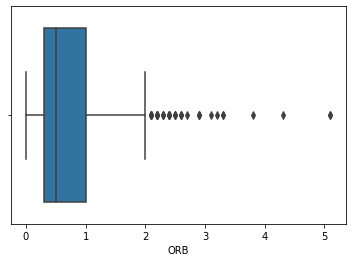

In [102]:
#Box plots to show some data exploration
sns.boxplot(x="ORB", data=data_nba_records)

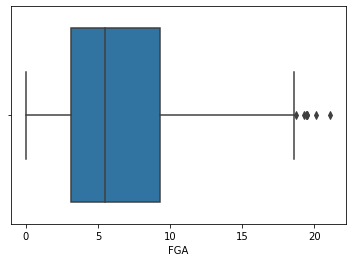

In [103]:
sns.boxplot(x="FGA", data=data_nba_records)

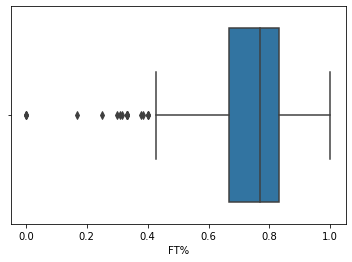

In [104]:
sns.boxplot(x="FT%", data=data_nba_records)

In [105]:
#Formatting the name of the players so that they are consistant with salary data set
for i in range(0,len(data_nba_records.Player)):
    x=data_nba_records.Player[i].split("\\",1)
    data_nba_records.Player[i]=x[0]

C:\Users\avani\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [106]:
data_nba_records.Player

0       Alex Abrines
1         Quincy Acy
2       Steven Adams
3        Bam Adebayo
4      Arron Afflalo
           ...      
659     Tyler Zeller
660     Tyler Zeller
661      Paul Zipser
662       Ante Zizic
663      Ivica Zubac
Name: Player, Length: 664, dtype: object

In [107]:
data_nba_records.Tm.value_counts()

TOT    59
HOU    24
MIL    24
MEM    24
LAL    24
NOP    23
DAL    23
PHI    23
DET    22
BRK    22
CLE    22
ATL    22
PHO    22
LAC    21
NYK    21
UTA    21
CHI    21
BOS    20
IND    19
ORL    19
MIA    19
TOR    18
DEN    18
SAC    18
SAS    17
CHO    17
OKC    17
GSW    17
POR    16
MIN    16
WAS    15
Name: Tm, dtype: int64

In [108]:
#Removing rows containing team as TOT since it is redundant
data_nba_records=data_nba_records[data_nba_records.Tm!="TOT"]

In [109]:
data_nba_records.Tm.value_counts()

HOU    24
LAL    24
MEM    24
MIL    24
PHI    23
NOP    23
DAL    23
PHO    22
BRK    22
CLE    22
DET    22
ATL    22
CHI    21
NYK    21
LAC    21
UTA    21
BOS    20
MIA    19
ORL    19
IND    19
SAC    18
TOR    18
DEN    18
CHO    17
OKC    17
SAS    17
GSW    17
MIN    16
POR    16
WAS    15
Name: Tm, dtype: int64

In [110]:
#Handling null values by replacing them with 0 since they are a result of a divide by zero operation
data_nba_records=data_nba_records.fillna(0)
data_nba_records.shape

(605, 30)

In [111]:
data_salary=pd.read_csv("nba_salary1718 _new.csv")

In [112]:
data_salary.shape

(573, 4)

In [113]:
data_salary.head()

,Unnamed: 0,Player,Tm,season17_18
0,1,Stephen Curry,GSW,34682550.0
1,2,LeBron James,CLE,33285709.0
2,3,Paul Millsap,DEN,31269231.0
3,4,Gordon Hayward,BOS,29727900.0
4,5,Blake Griffin,DET,29512900.0


In [114]:
#Merging salary with performance data set
df_merged=pd.merge(data_nba_records,data_salary,on=["Player"],how="inner")

In [115]:
df_merged.shape
df_merged.to_csv("merged.csv")

In [116]:
df_merged.head()

,Rk,Player,Pos,Age,Tm_x,G,GS,MP,FG,FGA,...,TRB,AST,STL,BLK,TOV,PF,PTS,Unnamed: 0,Tm_y,season17_18
0,1,Alex Abrines,SG,24,OKC,75,8,15.1,1.5,3.9,...,1.5,0.4,0.5,0.1,0.3,1.7,4.7,185,OKC,5725000.0
1,2,Quincy Acy,PF,27,BRK,70,8,19.4,1.9,5.2,...,3.7,0.8,0.5,0.4,0.9,2.1,5.9,350,BRK,1709538.0
2,3,Steven Adams,C,24,OKC,76,76,32.7,5.9,9.4,...,9.0,1.2,1.2,1.0,1.7,2.8,13.9,32,OKC,22471910.0
3,4,Bam Adebayo,C,20,MIA,69,19,19.8,2.5,4.9,...,5.5,1.5,0.5,0.6,1.0,2.0,6.9,281,MIA,2490360.0
4,5,Arron Afflalo,SG,32,ORL,53,3,12.9,1.2,3.1,...,1.2,0.6,0.1,0.2,0.4,1.1,3.4,291,ORL,2328652.0


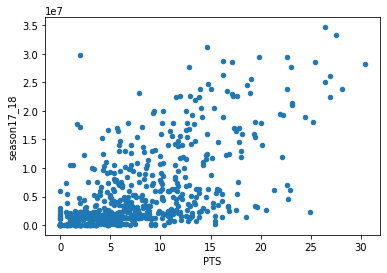

In [117]:
#Exploring the merged data set
x = df_merged.plot.scatter('PTS', 'season17_18')

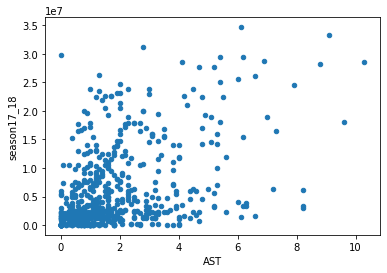

In [118]:
x = df_merged.plot.scatter('AST', 'season17_18')

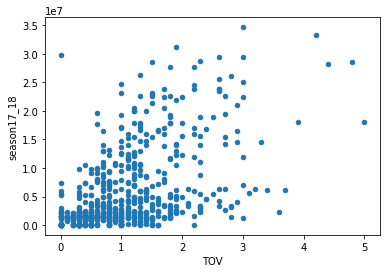

In [119]:
x = df_merged.plot.scatter('TOV', 'season17_18')

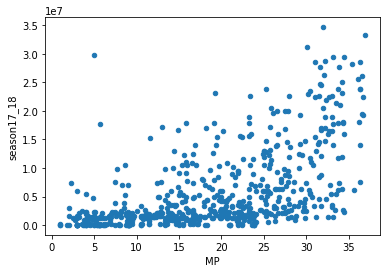

In [120]:
x = df_merged.plot.scatter('MP', 'season17_18')

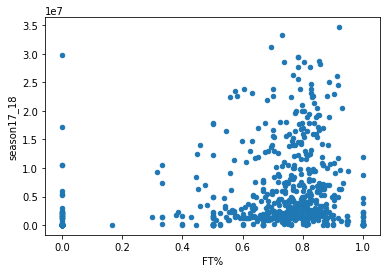

In [121]:
x = df_merged.plot.scatter('FT%', 'season17_18')

In [122]:
enc = OneHotEncoder()
enc.fit(df_merged)

OneHotEncoder(categorical_features=None, categories=None, drop=None,
              dtype=<class 'numpy.float64'>, handle_unknown='error',
              n_values=None, sparse=True)

In [123]:
#Splitting the data into training and testing
x_train, x_test, y_train, y_test = train_test_split(df_merged.iloc[:,[3,5,6,7,8,9,10,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30]],df_merged.iloc[:,-1],test_size=0.25,random_state=0)

In [124]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)

In [125]:
#Linear Regression
model = linear_model.LinearRegression()
fitted_model = model.fit(x_train[:,[1,2,9,10,14,15,18,19,20,22,23,24]],y_train)
print(fitted_model.coef_)

[ -989844.8884273   1973373.46203025  2765735.77188283 -4531155.87277911
  1728508.9379978   -164109.18940161  1338074.74171078  1452499.69159487
  -417018.48569372  -907146.08003371  -388562.90942365  2935932.28589027]


In [126]:
predicted= fitted_model.predict(x_test[:,[1,2,9,10,14,15,18,19,20,22,23,24]])

In [127]:
R_squared=r2_score(y_test, predicted)  
adjr2=1 -(1-R_squared)*(len(y_test)-1)/(len(y_test)-x_test[:,[1,2,9,10,14,15,18,19,20,22,23,24]].shape[1]-1)
print(R_squared,adjr2)

0.4751587549420895 0.4301723625085543


In [148]:
#Ridge regularization
rr = Ridge(alpha=1)
rr_model=rr.fit(x_train[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25]],y_train)
rr_model.coef_
#rr.score()

array([  427995.8419413 , -1368546.71612406,  1283401.52326322,
        -345448.86443622,  1341884.42866806,  -964957.74939715,
        -748516.56915193,    13737.80835666,    88876.57752729,
         437059.0034704 , -1698275.18440426,   284974.63886985,
         505177.69124844,   327557.16595093,  1161167.44316557,
        -473644.64198388,   115482.80663247,  -254613.16419608,
         709494.35914335,   984743.30234072,   -70451.42625283,
         223565.58631802,  -480752.6466937 ,  -600789.40168634,
         677751.14797385, -5016272.20215604])

In [147]:
#Lasso regularization
lr=linear_model.Lasso(alpha=0.1)
lr_model=lr.fit(x_train[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25]],y_train)
lr_model.coef_

C:\Users\avani\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2254936950672973.5, tolerance: 2229431041231.3936
  positive)


array([  417774.89235861, -1386735.17223371,  1277968.91230149,
        -321051.04267163,  2651378.39726179, -2053520.0305461 ,
        -875172.3265056 ,   314238.53705765,    69786.65245836,
          98021.46049022, -1139600.49244778,   296792.81885579,
         588369.26427585,   354632.62737093,  1301793.60416227,
        -461866.10690008,  -298600.40193248, -1281696.15380257,
        2042933.82793918,   996991.1238299 ,   -71274.84261225,
         218535.93487357,  -480878.8573514 ,  -596009.45285582,
        -109956.78294595, -5035572.62996736])

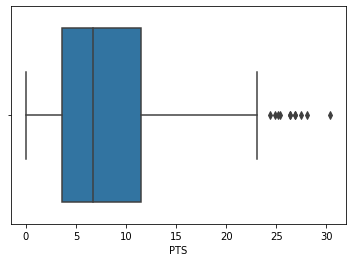

In [130]:
sns.boxplot(x="PTS", data=data_nba_records)

In [131]:
data_nba_records.head(30)

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Alex Abrines,SG,24,OKC,75,8,15.1,1.5,3.9,...,0.848,0.3,1.2,1.5,0.4,0.5,0.1,0.3,1.7,4.7
1,2,Quincy Acy,PF,27,BRK,70,8,19.4,1.9,5.2,...,0.817,0.6,3.1,3.7,0.8,0.5,0.4,0.9,2.1,5.9
2,3,Steven Adams,C,24,OKC,76,76,32.7,5.9,9.4,...,0.559,5.1,4.0,9.0,1.2,1.2,1.0,1.7,2.8,13.9
3,4,Bam Adebayo,C,20,MIA,69,19,19.8,2.5,4.9,...,0.721,1.7,3.8,5.5,1.5,0.5,0.6,1.0,2.0,6.9
4,5,Arron Afflalo,SG,32,ORL,53,3,12.9,1.2,3.1,...,0.846,0.1,1.2,1.2,0.6,0.1,0.2,0.4,1.1,3.4
5,6,Cole Aldrich,C,29,MIN,21,0,2.3,0.2,0.7,...,0.333,0.1,0.6,0.7,0.1,0.1,0.0,0.0,0.5,0.6
6,7,LaMarcus Aldridge,C,32,SAS,75,75,33.5,9.2,18.0,...,0.837,3.3,5.2,8.5,2.0,0.6,1.2,1.5,2.1,23.1
7,8,Jarrett Allen,C,19,BRK,72,31,20.0,3.3,5.5,...,0.776,2.0,3.4,5.4,0.7,0.4,1.2,1.1,2.0,8.2
8,9,Kadeem Allen,PG,25,BOS,18,1,5.9,0.3,1.2,...,0.778,0.2,0.4,0.6,0.7,0.2,0.1,0.5,0.8,1.1
9,10,Tony Allen,SF,36,NOP,22,0,12.4,2.0,4.1,...,0.524,0.9,1.2,2.1,0.4,0.5,0.1,0.9,2.2,4.7


In [132]:
data_nba_records.iloc[:,29]

0       4.7
1       5.9
2      13.9
3       6.9
4       3.4
       ... 
659     7.1
660     5.9
661     4.0
662     3.7
663     3.7
Name: PTS, Length: 605, dtype: float64

In [133]:
#Adding a extra column for classification
def scorer(x):
    if (x['PTS'] <= 10.0):
        return 'Low'
    elif (x['PTS'] < 20.0) :
        return 'Med'
    elif(x['PTS'] >= 20.0):
        return 'High'

In [134]:
data_nba_records['Score'] = data_nba_records.apply(scorer, axis=1)

In [135]:
data_nba_records.head(30)

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Score
0,1,Alex Abrines,SG,24,OKC,75,8,15.1,1.5,3.9,...,0.3,1.2,1.5,0.4,0.5,0.1,0.3,1.7,4.7,Low
1,2,Quincy Acy,PF,27,BRK,70,8,19.4,1.9,5.2,...,0.6,3.1,3.7,0.8,0.5,0.4,0.9,2.1,5.9,Low
2,3,Steven Adams,C,24,OKC,76,76,32.7,5.9,9.4,...,5.1,4.0,9.0,1.2,1.2,1.0,1.7,2.8,13.9,Med
3,4,Bam Adebayo,C,20,MIA,69,19,19.8,2.5,4.9,...,1.7,3.8,5.5,1.5,0.5,0.6,1.0,2.0,6.9,Low
4,5,Arron Afflalo,SG,32,ORL,53,3,12.9,1.2,3.1,...,0.1,1.2,1.2,0.6,0.1,0.2,0.4,1.1,3.4,Low
5,6,Cole Aldrich,C,29,MIN,21,0,2.3,0.2,0.7,...,0.1,0.6,0.7,0.1,0.1,0.0,0.0,0.5,0.6,Low
6,7,LaMarcus Aldridge,C,32,SAS,75,75,33.5,9.2,18.0,...,3.3,5.2,8.5,2.0,0.6,1.2,1.5,2.1,23.1,High
7,8,Jarrett Allen,C,19,BRK,72,31,20.0,3.3,5.5,...,2.0,3.4,5.4,0.7,0.4,1.2,1.1,2.0,8.2,Low
8,9,Kadeem Allen,PG,25,BOS,18,1,5.9,0.3,1.2,...,0.2,0.4,0.6,0.7,0.2,0.1,0.5,0.8,1.1,Low
9,10,Tony Allen,SF,36,NOP,22,0,12.4,2.0,4.1,...,0.9,1.2,2.1,0.4,0.5,0.1,0.9,2.2,4.7,Low


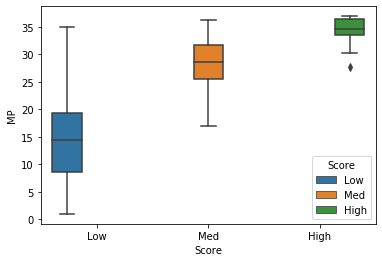

In [136]:
sns.boxplot(x=data_nba_records['Score'],y=data_nba_records['MP'],hue=data_nba_records['Score'])

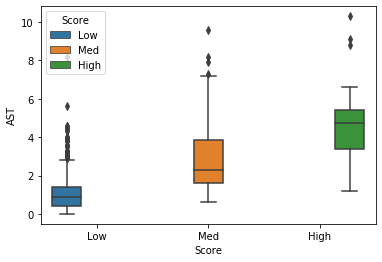

In [137]:
sns.boxplot(x=data_nba_records['Score'],y=data_nba_records['AST'],hue=data_nba_records['Score'])

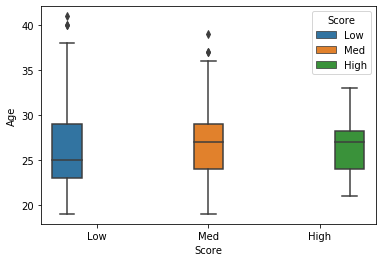

In [138]:
sns.boxplot(x=data_nba_records['Score'],y=data_nba_records['Age'],hue=data_nba_records['Score'])

In [139]:
#Splitting the data into training and testing
x_train2, x_test2, y_train2, y_test2 = train_test_split(data_nba_records.iloc[:,[3,5,6,7,8,9,10,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27]],data_nba_records.iloc[:,-1],test_size=0.25,random_state=0)

In [140]:
scaler = StandardScaler()
scaler.fit(x_train2)
x_train2=scaler.transform(x_train2)
x_test2=scaler.transform(x_test2)

[0.9144736842105263, 0.08552631578947367, array([0.625     , 0.94495413, 0.88571429]), array([0.83333333, 0.97169811, 0.775     ]), array([0.71428571, 0.95813953, 0.82666667])]


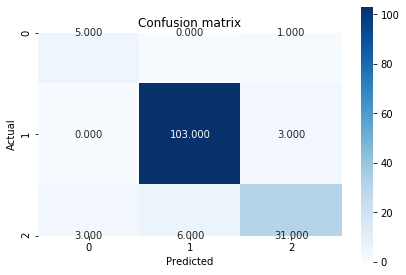

In [141]:
#KNN classification
classifier = KNeighborsClassifier(n_neighbors = 3, p = 1)
classifier.fit(x_train2[:,[1,2,4,10,14,15,16,17,19,20,21,22]], y_train2)
y_pred2 = classifier.predict(x_test2[:,[1,2,4,10,14,15,16,17,19,20,21,22]])

conf_matrix = metrics.confusion_matrix(y_test2, y_pred2)
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

accuracy = metrics.accuracy_score(y_test2, y_pred2)
error = 1 - metrics.accuracy_score(y_test2, y_pred2)
precision = metrics.precision_score(y_test2, y_pred2, average = None)
recall = metrics.recall_score(y_test2, y_pred2, average = None)
F1_score = metrics.f1_score(y_test2, y_pred2, average = None)
print([accuracy, error, precision, recall, F1_score])

[0.8947368421052632, 0.10526315789473684, array([0.66666667, 0.96969697, 0.77272727]), array([1.        , 0.90566038, 0.85      ]), array([0.8       , 0.93658537, 0.80952381])]


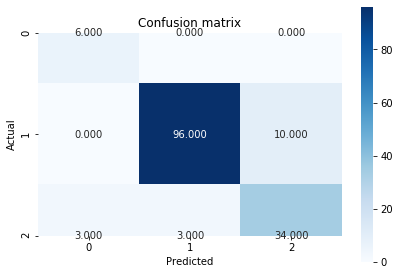

In [142]:
#NB classification
classifier = GaussianNB()  
classifier.fit(x_train2[:,[1,2,4,10,14,15,16,17,19,20,21,22]], y_train2)
y_pred2 = classifier.predict(x_test2[:,[1,2,4,10,14,15,16,17,19,20,21,22]])

conf_matrix = metrics.confusion_matrix(y_test2, y_pred2)
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

accuracy = metrics.accuracy_score(y_test2, y_pred2)
error = 1 - metrics.accuracy_score(y_test2, y_pred2)
precision = metrics.precision_score(y_test2, y_pred2, average = None)
recall = metrics.recall_score(y_test2, y_pred2, average = None)
F1_score = metrics.f1_score(y_test2, y_pred2, average = None)
print([accuracy, error, precision, recall, F1_score])

[0.9671052631578947, 0.03289473684210531, array([0.66666667, 0.99056604, 0.97297297]), array([1.        , 0.99056604, 0.9       ]), array([0.8       , 0.99056604, 0.93506494])]


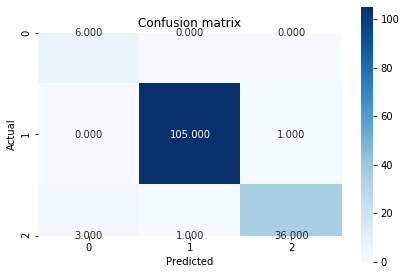

In [145]:
#SVM
classifier = SVC(kernel = 'linear', decision_function_shape = 'ovr')  
classifier.fit(x_train2[:,[1,2,4,10,14,15,16,17,19,20,21,22]], y_train2)
y_pred2 = classifier.predict(x_test2[:,[1,2,4,10,14,15,16,17,19,20,21,22]])

conf_matrix = metrics.confusion_matrix(y_test2, y_pred2)
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

accuracy = metrics.accuracy_score(y_test2, y_pred2)
error = 1 - metrics.accuracy_score(y_test2, y_pred2)
precision = metrics.precision_score(y_test2, y_pred2, average = None)
recall = metrics.recall_score(y_test2, y_pred2, average = None)
F1_score = metrics.f1_score(y_test2, y_pred2, average = None)
print([accuracy, error, precision, recall, F1_score])

[0.9671052631578947, 0.03289473684210531, array([0.71428571, 0.99056604, 0.94871795]), array([0.83333333, 0.99056604, 0.925     ]), array([0.76923077, 0.99056604, 0.93670886])]


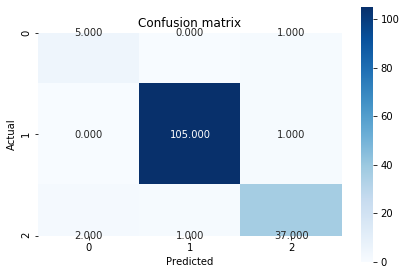

In [146]:
#Decision tree classifier
classifier = DecisionTreeClassifier(criterion = "entropy", random_state = 0)
classifier.fit(x_train2, y_train2)
y_pred2 = classifier.predict(x_test2)

conf_matrix = metrics.confusion_matrix(y_test2, y_pred2)
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

accuracy = metrics.accuracy_score(y_test2, y_pred2)
error = 1 - metrics.accuracy_score(y_test2, y_pred2)
precision = metrics.precision_score(y_test2, y_pred2, average = None)
recall = metrics.recall_score(y_test2, y_pred2, average = None)
F1_score = metrics.f1_score(y_test2, y_pred2, average = None)
print([accuracy, error, precision, recall, F1_score])